# Bienvenidos a la Ayudantía 02
# Repaso materia e prática.

- Descenso del gradiente.
- Arquitectura de una red multicapa.
- Capas, Por qué una función de activación?
- Clasificadores vs. Regresiones.
- Cómo entrenar una red neuronal.
- Montando nuestro arquitectura multicapas.

optimizer, funcion de perdida, loss.backward(propagación retrogado), todo el dataset? que es un batch? que es una epoca?

In [10]:
tasa_de_aprendizaje = 0.05

# Valor inicial de un peso
peso = 0.0
peso_2 = 10

def gradient(peso): 
    # Recuerdando que el gradiente será la derivada de nuestra función
    #Exemplo gradiente para la función x*3 -4x
    return (3 * (peso**2)) - 4

# Gradient descent update
for i in range(10):
    peso_2 -= tasa_de_aprendizaje * gradient(peso_2)
    peso -= tasa_de_aprendizaje * gradient(peso)
    print(f"Iteration {i+1}: {'w1 =' + str(peso) +',':30} {'w2 =' + str(peso_2)}")


Iteration 1: w1 =0.2,                       w2 =-4.800000000000001
Iteration 2: w1 =0.394,                     w2 =-8.056000000000001
Iteration 3: w1 =0.5707146000000001,        w2 =-17.590870400000004
Iteration 4: w1 =0.7218573268020261,        w2 =-63.80667861443945
Iteration 5: w1 =0.8436956267633611,        w2 =-674.3005139853941
Iteration 6: w1 =0.936922280170418,         w2 =-68876.27798813039
Iteration 7: w1 =1.0052487763084577,        w2 =-711660126.5027204
Iteration 8: w1 =1.05367001096801,          w2 =-7.596902105974032e+16
Iteration 9: w1 =1.087136937166011,         w2 =-8.656938241162906e+32
Iteration 10: w1 =1.1098569291434066,        w2 =-1.1241386956696307e+65


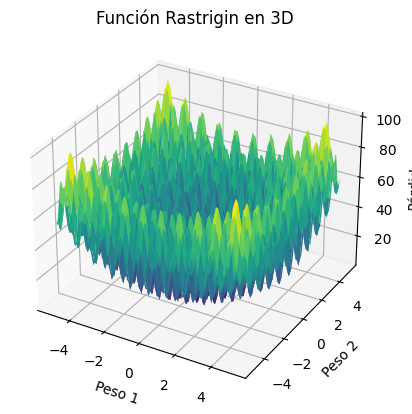

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Definir la función Rastrigin
def rastrigin(X, Y):
    A = 15
    return 2 * A + (X ** 2 - A * np.cos(2 * np.pi * X)) + (Y ** 2 - A * np.cos(2 * np.pi * Y))

# Crear valores para los ejes X e Y
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
x, y = np.meshgrid(x, y)

# Calcular los valores Z basados en X e Y
z = rastrigin(x, y)

# Crear una figura y un conjunto de subgráficos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
ax.plot_surface(x, y, z, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('Peso 1')
ax.set_ylabel('Peso 2')
ax.set_zlabel('Pérdida')
ax.set_title('Función Rastrigin en 3D')

# Mostrar el gráfico
plt.show()


# Arquitectura de una Red Multicapa (Multilayer Network Architecture)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN_NoActivaction(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x


In [12]:
class SimpleNN_ConActivacion(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


## ¿Por qué una Función de Activación?
Esto es porque para usar correctamente el decenso del gradiente, necesitamos funciones que sean diferenciables, y las funciones de activación van hacer este papel, no es por nada que siempre para cada capa vamos agregando las funciones de activación.

In [14]:
from sklearn.datasets import load_iris
import torch
from torch.optim import SGD, Adam

data = load_iris()
print(len(data['data']))
test_size = int(2* len(data['data'])/3)

train_data = data['data'][0:test_size]
train_traget = data['target'][0:test_size]

X = torch.tensor(train_data, dtype=torch.float32)
y = torch.tensor(train_traget, dtype=torch.long)

criterion = nn.CrossEntropyLoss()
criterion_con_activacion = nn.CrossEntropyLoss()

model = SimpleNN_NoActivaction()
model_con_activacion = SimpleNN_ConActivacion()

optimizer = SGD(model.parameters(), lr=0.5)
optimizer_con_activacion = SGD(model_con_activacion.parameters(), lr=0.5)

for epoch in range(111):
    optimizer.zero_grad()
    optimizer_con_activacion.zero_grad()
    
    output = model(X)
    output_con_activacion = model_con_activacion(X)

    loss = criterion(output, y)
    loss.backward()

    loss_con_activacion = criterion_con_activacion(output_con_activacion, y)
    loss_con_activacion.backward()
    
    optimizer.step()
    optimizer_con_activacion.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}, Loss sin activacion: {loss.item()}  Loss con activacion: {loss_con_activacion.item()}")





150
Epoch 1, Loss sin activacion: 1.1468712091445923  Loss con activacion: 1.0679060220718384
Epoch 11, Loss sin activacion: nan  Loss con activacion: 0.23398374021053314
Epoch 21, Loss sin activacion: nan  Loss con activacion: 0.03117750585079193
Epoch 31, Loss sin activacion: nan  Loss con activacion: 0.004040003288537264
Epoch 41, Loss sin activacion: nan  Loss con activacion: 0.0021126563660800457
Epoch 51, Loss sin activacion: nan  Loss con activacion: 0.0014364025555551052
Epoch 61, Loss sin activacion: nan  Loss con activacion: 0.0010864179348573089
Epoch 71, Loss sin activacion: nan  Loss con activacion: 0.0008719158940948546
Epoch 81, Loss sin activacion: nan  Loss con activacion: 0.0007270892965607345
Epoch 91, Loss sin activacion: nan  Loss con activacion: 0.0006227702251635492
Epoch 101, Loss sin activacion: nan  Loss con activacion: 0.0005441810353659093
Epoch 111, Loss sin activacion: nan  Loss con activacion: 0.00048287829849869013


## Clasificadores vs. Regresiones 
- Regresion
- - La regresión son problemas que queremos inferir un valor 'especifico', como una temperatura dado una ciudad y una fecha. 
- - Es muy tipico para regresión usar funciones de perdida como el MSE minimum Square Error ( Minimo error cuadratico)


- Clasificadores
- - Son problemas que queremos diferenciar, esto es, predicir si uma imagen pertenece a una clase especifica. Una clase es un posible output, por ejemplo dado una temperatura una ciudad y una fecha podemos clasificar como seco, humedo.
- - Generalmente usamos funciones como CrossEntropyLoss para poder aproximar de mejor forma nuestra clasificación, además de la última capa usamos un SOFTMAX, esto es, transformamos en una distribuicción de probabilidad para cada clase, donde la salida será un vector que las probabilidades suman 1.

## Optimizador

torch.optim is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can also be easily integrated in the future.
https://pytorch.org/docs/stable/optim.html

SGD y Adam son lo más comunes, si quieres saber más a respecto pueden buscar en la literatura
- ( https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) SGD 
- ( https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) Adam

Les dejo por si tienen curiosidad, pero para este curso, huye mucho del escopo

# Jugando con funciones de perdida para un clasificador

#### Vamos tomar el mismo ejemplo del Iris dataset, para ver como se comporta nuestra perdida, y precisión del modelo con distintas funciones de perdida

In [6]:
class SimpleNN_ConActivacion_softmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x


In [22]:

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from torch.optim import SGD
import torch

data = load_iris()

train_data = data['data']
train_traget = data['target']

encoder = OneHotEncoder(sparse=False)

train_target_onehot = encoder.fit_transform(train_traget.reshape(-1, 1))
y_MSE = torch.tensor(train_target_onehot, dtype=torch.float32)

X = torch.tensor(train_data, dtype=torch.float32)
y = torch.tensor(train_traget, dtype=torch.long)

indices = torch.randperm(len(X))

X = X[indices]
y = y[indices]

X_train = X[0:100]
y_train = y[0:100]

X_test= X[100:]
y_test = y[100:]


criterion_CEntropy = nn.CrossEntropyLoss()
criterion_MSE= nn.MSELoss()

model_con_activacion = SimpleNN_ConActivacion()
model_con_activacion_softmax = SimpleNN_ConActivacion_softmax()


optimizer_con_activacion = SGD(model_con_activacion.parameters(), lr=0.1)
optimizer_con_activacion_softmax = SGD(model_con_activacion_softmax.parameters(), lr=0.1)

for epoch in range(1000):
    
    optimizer_con_activacion.zero_grad()
    optimizer_con_activacion_softmax.zero_grad()
    
    output_con_activacion = model_con_activacion(X)
    output_con_activacion_softmax = model_con_activacion_softmax(X)
    
    loss_MSE = criterion_MSE(output_con_activacion, y_MSE)
    loss_MSE.backward()

    loss_CE = criterion_CEntropy(output_con_activacion_softmax, y)
    loss_CE.backward()
    
    optimizer_con_activacion_softmax.step()
    optimizer_con_activacion.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}, Loss MSE activacion: {loss_MSE.item()}  Loss CrossEntropy activacion: {loss_CE.item()}")




C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1, Loss MSE activacion: 0.7088337540626526  Loss CrossEntropy activacion: 1.1008177995681763
Epoch 101, Loss MSE activacion: 0.2190486341714859  Loss CrossEntropy activacion: 0.6996264457702637
Epoch 201, Loss MSE activacion: 0.2176280915737152  Loss CrossEntropy activacion: 0.6331546902656555
Epoch 301, Loss MSE activacion: 0.21634043753147125  Loss CrossEntropy activacion: 0.6017159819602966
Epoch 401, Loss MSE activacion: 0.2155272364616394  Loss CrossEntropy activacion: 0.5914347767829895
Epoch 501, Loss MSE activacion: 0.215071439743042  Loss CrossEntropy activacion: 0.58616042137146
Epoch 601, Loss MSE activacion: 0.21517592668533325  Loss CrossEntropy activacion: 0.5830116271972656
Epoch 701, Loss MSE activacion: 0.21358968317508698  Loss CrossEntropy activacion: 0.5808554291725159
Epoch 801, Loss MSE activacion: 0.21244072914123535  Loss CrossEntropy activacion: 0.5792604088783264
Epoch 901, Loss MSE activacion: 0.21275006234645844  Loss CrossEntropy activacion: 0.5780172

In [23]:
from sklearn.metrics import accuracy_score
# Test loop for the model trained with MSE
y_pred_MSE = model_con_activacion(X_test)
y_pred_MSE = torch.argmax(y_pred_MSE, axis=1)  # convert from one-hot to class index
accuracy_MSE = accuracy_score(y_test, y_pred_MSE)
error_MSE = F.mse_loss(y_pred_MSE.float(), y_test.float()).item()

print(f"Test accuracy for model with MSE: {accuracy_MSE}")
print(f"Test error for model with MSE: {error_MSE}")

# Test loop for the model trained with Cross Entropy
y_pred_CE = model_con_activacion_softmax(X_test)
y_pred_CE = torch.argmax(y_pred_CE, axis=1)  # get the class index
accuracy_CE = accuracy_score(y_test, y_pred_CE)
error_CE = F.cross_entropy(model_con_activacion_softmax(X_test), y_test).item()

print(f"Test accuracy for model with Cross Entropy: {accuracy_CE}")
print(f"Test error for model with Cross Entropy: {error_CE}")

Test accuracy for model with MSE: 0.38
Test error for model with MSE: 0.6800000071525574
Test accuracy for model with Cross Entropy: 0.96
Test error for model with Cross Entropy: 0.5907894372940063


In [26]:
def evaluate_model(model, X_test, y_test):
    correct = 0
    total = 0
    print("Model Class Prediction vs True Label:")
    for i in range(len(X_test)):
        x_sample = X_test[i].unsqueeze(0)
        y_sample = y_test[i]
        y_pred_sample = model(x_sample)
        y_pred_label = torch.argmax(y_pred_sample, axis=1)
        if y_pred_label == y_sample:
            correct += 1
        total += 1
        print(f"Predicted class: {y_pred_label.item()}, True class: {y_sample.item()}")

    accuracy = correct / total * 100
    print(f"Model Accuracy: {accuracy}%")

# ... (Your training code here)

# After training, evaluate both models
print("\nEvaluation for model trained with MSE:")
evaluate_model(model_con_activacion, X_test, y_test)

print("\nEvaluation for model trained with Cross Entropy:")
#valuate_model(model_con_activacion_softmax, X_test, y_test)


Evaluation for model trained with MSE:
Model Class Prediction vs True Label:
Predicted class: 0, True class: 1
Predicted class: 1, True class: 0
Predicted class: 2, True class: 2
Predicted class: 1, True class: 1
Predicted class: 2, True class: 2
Predicted class: 2, True class: 2
Predicted class: 1, True class: 0
Predicted class: 2, True class: 1
Predicted class: 2, True class: 2
Predicted class: 0, True class: 1
Predicted class: 1, True class: 2
Predicted class: 0, True class: 1
Predicted class: 2, True class: 2
Predicted class: 2, True class: 2
Predicted class: 1, True class: 0
Predicted class: 0, True class: 1
Predicted class: 2, True class: 2
Predicted class: 1, True class: 2
Predicted class: 2, True class: 2
Predicted class: 0, True class: 1
Predicted class: 0, True class: 1
Predicted class: 1, True class: 0
Predicted class: 1, True class: 1
Predicted class: 2, True class: 2
Predicted class: 2, True class: 2
Predicted class: 0, True class: 1
Predicted class: 2, True class: 2
Pred